In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tweet_df = pd.read_csv('train.csv')

In [4]:
tweet_df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [15]:
#Importing the dataset
tweet_df = tweet_df.drop(["id"], axis = 1)

In [16]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


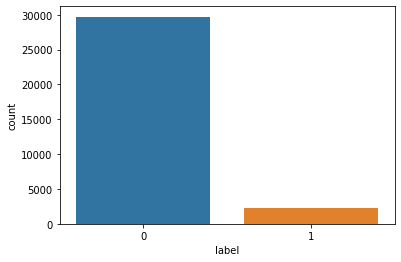

In [19]:
#Explore the Dataset
sns.countplot(tweet_df['label'], label = 'count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21814250>]],
      dtype=object)

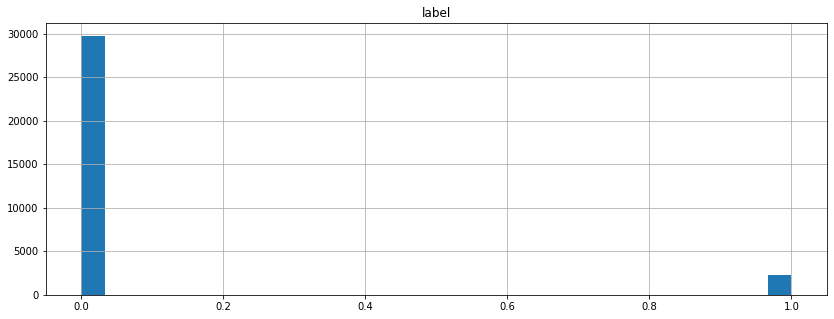

In [18]:
tweet_df.hist(bins=30, figsize=(14,5))

In [21]:
tweet_df['length'] = tweet_df['tweet'].apply(len)

In [22]:
tweet_df.head(2)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122


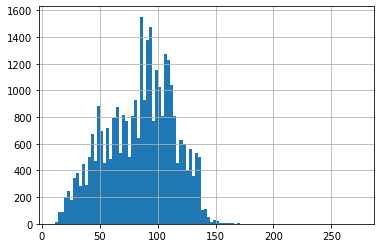

In [30]:
tweet_df['length'].hist(bins = 100)

In [33]:
tweet_df.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [35]:
#lets see the shortest tweet
tweet_df[tweet_df['length'] == 11]

,label,tweet,length
25195,0,i love you,11


In [37]:
tweet_df[tweet_df['length'] == 84]

,label,tweet,length
43,0,my mom shares the same bihday as @user bihda...,84
220,0,g o a l s ð repost from @user #propey #ocea...,84
640,0,oscar tabarez talks luis suarezâs angry reac...,84
723,0,@user another hands &amp; feet complete!! ber...,84
742,0,because great things never came from comfo zon...,84
...,...,...,...
31445,0,.@user on making choices to keep herself as ...,84
31448,0,i'm a gordo. #passpo #florence #firenze #italy...,84
31509,0,just 3 keys that are found on your computer to...,84
31857,0,traveling happy #family holidays #car #sunny...,84


In [39]:
positive = tweet_df[tweet_df['label'] == 0]
positive

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
...,...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...,61
31957,0,ate @user isz that youuu?ðððððð...,68
31958,0,to see nina turner on the airwaves trying to...,131
31959,0,listening to sad songs on a monday morning otw...,63


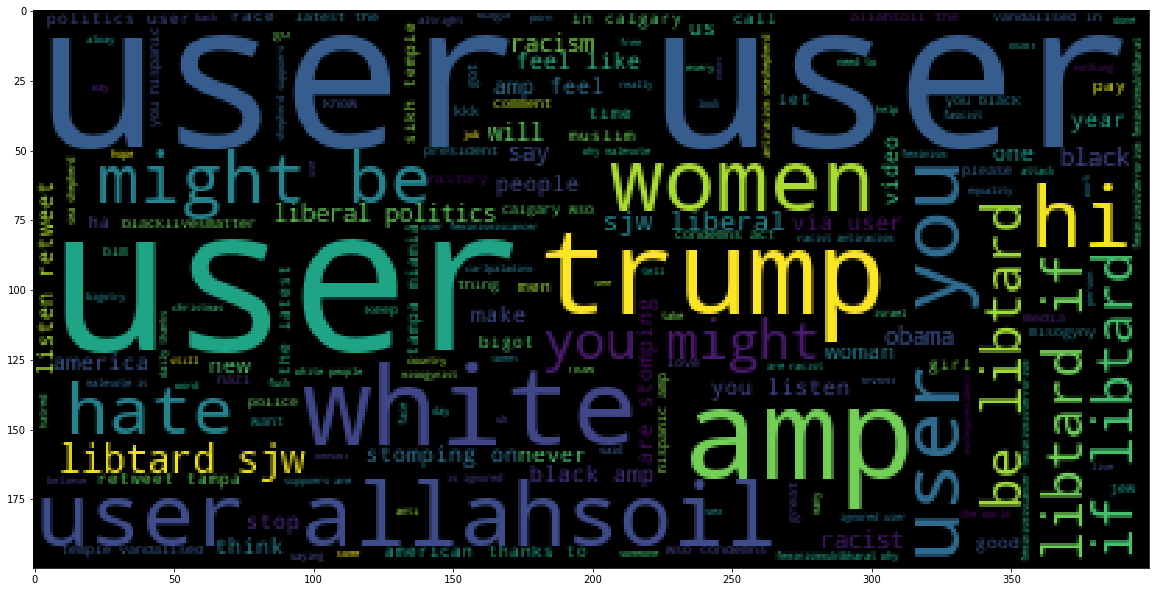

In [54]:
negetive = tweet_df[tweet_df['label'] == 1]
negetive_tweet = negetive['tweet'].tolist()
negetive_tweet_sentence = ' '.join(negetive_tweet)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negetive_tweet_sentence))

In [45]:
#step4 Plot the word cloud
sentences = tweet_df['tweet'].tolist()
sentences
len(sentences)

31962

In [48]:
sentence = ' '.join(sentences)


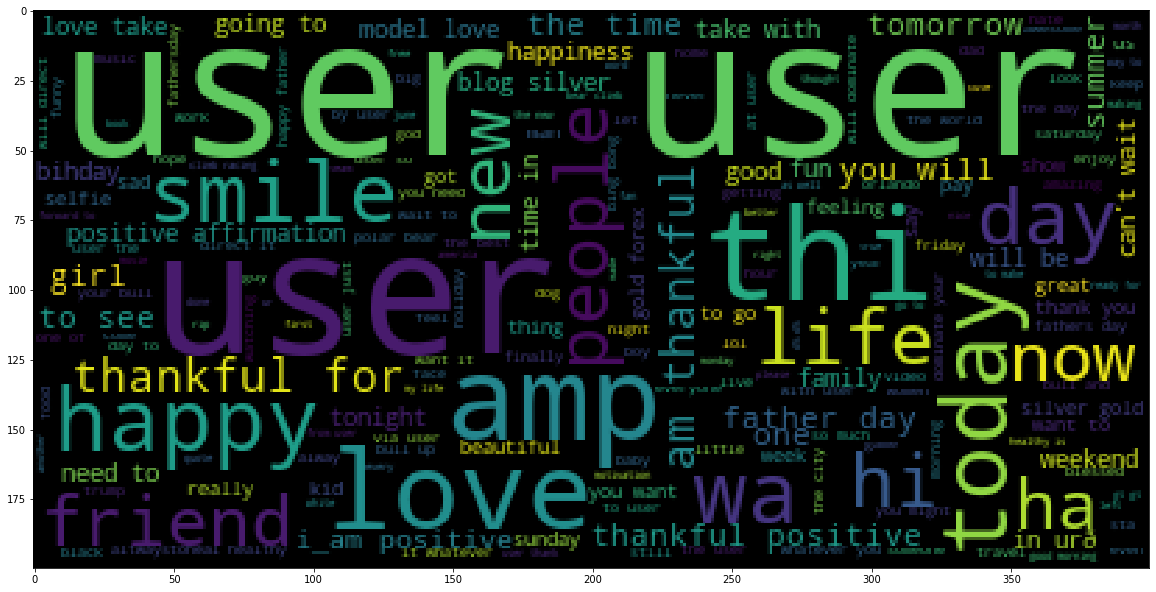

In [50]:
!pip install WordCloud
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentence))

In [57]:
#Task #5: Perform data cleaning - removing punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
def removePunctuation(s):
    l = []
    for i in s:
        if i not in string.punctuation:
            l.append(i)
    s = ''.join(l)
    return s

tweet_df['cleaned'] = tweet_df['tweet'].apply(removePunctuation)

In [62]:
tweet_df

,label,tweet,length,cleaned
0,0,@user when a father is dysfunctional and is s...,102,user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit i cant use ca...
2,0,bihday your majesty,21,bihday your majesty
3,0,#model i love u take with u all the time in ...,86,model i love u take with u all the time in u...
4,0,factsguide: society now #motivation,39,factsguide society now motivation
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,ate user isz that youuuðððððð...
31958,0,to see nina turner on the airwaves trying to...,131,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,63,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,user sikh temple vandalised in in calgary wso ...


In [65]:
#Task #6: Perform data cleaning - remove stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gauravbansal1600/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [105]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))


In [115]:
#Method 1
%time
stopwords.update(['ð','zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
def removeStopWords(sentence):
    l = []
    for word in sentence.split():
        if word.lower() not in stopwords:
            l.append(word)
        sentence = " ".join(l)
    return sentence

tweet_df['removed_stopwords'] = tweet_df['cleaned'].apply(removeStopWords)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [116]:
tweet_df

,label,tweet,length,cleaned,removed_stopwords
0,0,@user when a father is dysfunctional and is s...,102,user when a father is dysfunctional and is so...,user father dysfunctional selfish drags kids d...
1,0,@user @user thanks for #lyft credit i can't us...,122,user user thanks for lyft credit i cant use ca...,user user thanks lyft credit cant use cause do...
2,0,bihday your majesty,21,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in ...,86,model i love u take with u all the time in u...,model love u take u time urð± ðððð...
4,0,factsguide: society now #motivation,39,factsguide society now motivation,factsguide society motivation
...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,68,ate user isz that youuuðððððð...,ate user isz youuuððððððð...
31958,0,to see nina turner on the airwaves trying to...,131,to see nina turner on the airwaves trying to...,see nina turner airwaves trying wrap mantle ge...
31959,0,listening to sad songs on a monday morning otw...,63,listening to sad songs on a monday morning otw...,listening sad songs monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",67,user sikh temple vandalised in in calgary wso ...,user sikh temple vandalised calgary wso condem...


In [174]:
#Task #7: Perform Count Vectorization (Tokenization)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer='word', dtype='uint8')
x = vectorizer.fit_transform(tweet_df['removed_stopwords']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [188]:
x.shape

(31962, 43653)

In [131]:
y = tweet_df['label']
y

0        0
1        0
2        0
3        0
4        0
        ..
31957    0
31958    0
31959    0
31960    1
31961    0
Name: label, Length: 31962, dtype: int64

In [134]:
# Task08 Spplit the test dataset
from sklearn.model_selection import train_test_split
# split dataset into training and validation set
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=9)

In [135]:
#Task #09: Train a Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
NB_classfier = MultinomialNB()
NB_classfier.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [139]:
#Task #10: Assess trained model performance
from sklearn.metrics import confusion_matrix, classification_report
y_perdict = NB_classfier.predict(x_test)
cm = confusion_matrix(y_test, y_perdict)
cm

array([[7248,  185],
       [ 249,  309]])

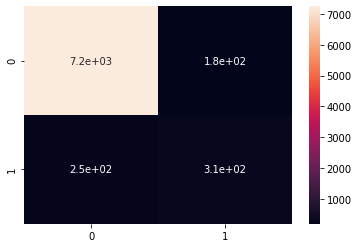

In [140]:
sns.heatmap(cm, annot=True)

In [141]:
print(classification_report(y_test, y_perdict))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7433
           1       0.63      0.55      0.59       558

    accuracy                           0.95      7991
   macro avg       0.80      0.76      0.78      7991
weighted avg       0.94      0.95      0.94      7991



## Checking the model on test dataset

In [177]:
test = pd.read_csv("test.csv")

In [178]:
tweet_df_test = test.drop(["id"], axis = 1)

In [179]:
tweet_df_test.head()

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."


In [180]:
tweet_df_test['tweet'] = tweet_df_test['tweet'].apply(removePunctuation)

In [181]:
tweet_df_test['tweet'] = tweet_df_test['tweet'].apply(removeStopWords)
tweet_df_test['tweet']

0        studiolife aislife requires passion dedication...
1        user white supremacists want everyone see new ...
2        safe ways heal acne altwaystoheal healthy healing
3        hp cursed child book reservations already yes ...
4        3rd bihday amazing hilarious nephew eli ahmir ...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like mermaid ð hairflip neverready ...
17194    hillary campaigned today ohioomg amp used word...
17195    happy work conference right mindset leads cult...
17196    song glad free download shoegaze newmusic newsong
Name: tweet, Length: 17197, dtype: object

In [199]:
tf_test_nolabel=vectorizer.transform(tweet_df_test['tweet'])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [201]:
from sklearn.metrics import confusion_matrix, classification_report
y_perdict = NB_classfier.predict(tf_test_nolabel)

ValueError: dimension mismatch